In [1]:
import numpy as np
import pandas as pd
from scipy.special import logit
from fairforest import d_tree
from fairforest import utils
import warnings
import matplotlib.pyplot as plt

In [2]:
warnings.simplefilter("ignore")


In [3]:
np.random.seed(0)

In [4]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


In [10]:
z = np.zeros(1000)
for j in range(1000):
    z[j] = np.random.binomial(1,0.7)
x_correlated = np.zeros((1000,4))
x_uncorrelated = np.zeros((1000,16))
for j in range(16):
    for i in range (1000):
        if j < 4:
            x_correlated[i][j] = np.random.normal((z[i] + 1), 1, 1)
        x_uncorrelated[i][j] = np.random.normal(0,1,1)
x = np.concatenate((x_correlated,x_uncorrelated),axis=1)
x = np.concatenate((x,np.reshape(z,(1000,1))),axis=1)
b = np.zeros(21)
noise = np.random.normal(0,1,1000)
for i in range (10):
    b[i] = np.random.normal(5,0.1,1)
y = logit(NormalizeData(np.dot(x,b)) + noise.T)
for i in range (len(y)):
    if y[i] > 0:
        y[i] = int(1)
    else:
        y[i] = int(0)
column = []
for i in range(21):
    column.append(str(i+1))
dataframe = pd.DataFrame(x, columns = column)


In [6]:
model_dtree = d_tree.DecisionTree(20,0,'21',1)
model_dtree.fit(dataframe,y)



build tree for node  0
spliting
spliting done
15 -2.3845134846527016
build tree for node  1
spliting
spliting done
12 -0.6716598385654942
build tree for node  3
only one class for this node
build tree for node  4
only one class for this node
build tree for node  2
spliting
spliting done
4 2.935480116552684
build tree for node  5
spliting
spliting done
9 2.612320340240069
build tree for node  7
spliting
spliting done
12 -2.687111055969159
build tree for node  9
only one class for this node
build tree for node  10
spliting
spliting done
17 -2.6263549819387606
build tree for node  11
only one class for this node
build tree for node  12
spliting
spliting done
14 2.193839947806427
build tree for node  13
spliting
spliting done
14 0.44289042423861835
build tree for node  15
spliting
spliting done
6 -2.668873656388919
build tree for node  17
only one class for this node
build tree for node  18
spliting
spliting done
11 -0.7397396550853204
build tree for node  19
spliting
spliting done
15 -0.4

In [7]:
fairness_importance = model_dtree._fairness_importance()

1 0.07349896480331264
2 0.13383838383838384
3 -0.10419210419210417
4 0.0
5 -0.022675736961451247
6 -0.1211951447245565
7 0.1484375
8 0.16666666666666669
9 -0.3422514619883041
10 -0.15625
11 0.1481810115350488
12 0.11111111111111112
13 -0.017089093701996922
14 0.021008403361344543
15 -0.20455555555555555
16 0.0
17 -0.33187088274044796
18 0.0
19 -0.3165266106442577
20 0.14583333333333334
21 0


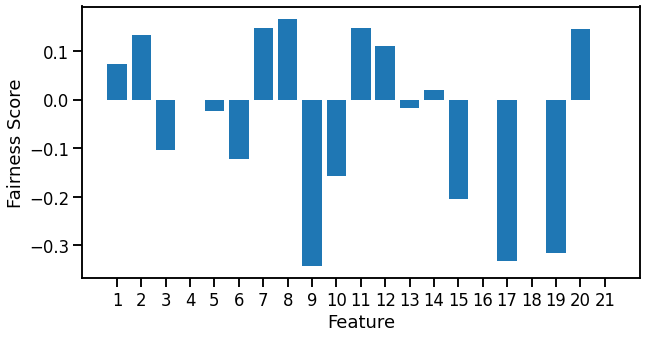

In [8]:
feature = []
score = []
for key, value in fairness_importance.items():
    print(key, value)
    feature.append(key)
    score.append((value))
utils.draw_plot(feature,score,"Results/Synthetic/eqop.pdf")



In [11]:
model_dtree_dp = d_tree.DecisionTree(20,0,'21',2)
model_dtree_dp.fit(dataframe,y)



build tree for node  0
spliting
spliting done
16 2.5526364422338945
build tree for node  1
spliting
spliting done
4 1.459084688988378
build tree for node  3
spliting
spliting done
10 1.9251637681041918
build tree for node  5
spliting
spliting done
15 2.2906389111820724
build tree for node  7
spliting
spliting done
15 -2.3074595672437326
build tree for node  9
spliting
spliting done
20 0.407680017299257
build tree for node  11
only one class for this node
build tree for node  12
only one class for this node
build tree for node  10
spliting
spliting done
5 1.4442082087455677
build tree for node  13
spliting
spliting done
11 2.131015267841124
build tree for node  15
spliting
spliting done
4 -2.3487253744023313
build tree for node  17
only one class for this node
build tree for node  18
spliting
spliting done
20 2.5756723278019145
build tree for node  19
spliting
spliting done
19 2.2442672879276326
build tree for node  21
spliting
spliting done
2 2.6855694376930233
build tree for node  23


In [12]:
fairness_importance_dp = model_dtree_dp._fairness_importance()

1 -0.05798708382519163
2 0.10037417093301793
3 0.012207508570690653
4 0.04730202581365761
5 0.10105376904759522
6 -0.008203017633821197
7 -0.09051562371833137
8 -0.051960323983115626
9 -0.11209020636352582
10 0.06014387549138437
11 -0.4425189141730222
12 -0.14578137956771303
13 0.05944722280544849
14 0.07703703703703703
15 0.042630861387781986
16 -0.08808738560437208
17 -0.03660795967587542
18 0.17720916747230084
19 0.3989636323161485
20 -0.17935896753086925
21 0


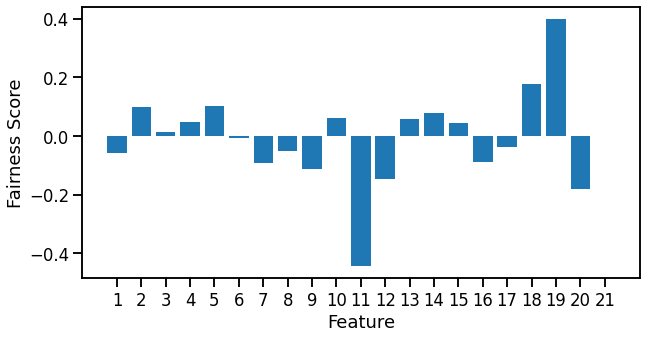

In [13]:
feature = []
score_dp = []
for key, value in fairness_importance_dp.items():
    print(key, value)
    feature.append(key)
    score_dp.append((value))
utils.draw_plot(feature,score_dp,"Results/Synthetic/DP.pdf")


In [ ]:
count_z0 = count_z1 = 0
count0 = count1 = 0
z0 = z1 = 0
for i in range (1000):
    if y[i] == 0:
        count0+=1
    else:
        count1+=1
        if x[i][20] == 0:
            count_z0 += 1
        else:
            count_z1 +=1
    if x[i][20] == 0:
        z0+=1
    else:
        z1+=1
print(count0,count1, count_z0,count_z1,z0,z1)

